# Assignment1 MLP Report
周澳蕾 11811337
### Generate dataset
+ Define default constant the problem asked
+ Generate using make_moon method provided by sklearn

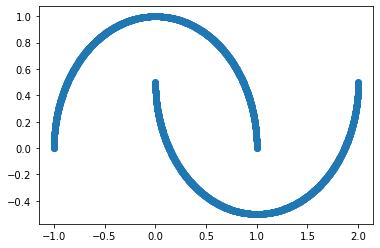

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np
from mlp_numpy import MLP
from modules import CrossEntropy
from train_mlp_numpy import *
from sklearn import datasets
import matplotlib.pyplot as plt

# Default constants
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 10
GRAD_TYPE_DEFAULT = 'BATCH'

FLAGS = None

x, t = datasets.make_moons(n_samples=2000, shuffle=True, noise=None, random_state=None)
plt.scatter(x[:,0], x[:,1])
plt.show()

t = np.array([[t[i], 1-t[i]] for i in range(len(t))])
train_x = x[:1400]
train_t = t[:1400]
test_x = x[1400:]
test_t = t[1400:]

### Train the data & Record accuracy and loss - Batch gradient descent
+ Train the data with MLP(batch gradient descent) with default parameters
+ We find that MLP quickly coverages. The accuracy increases to more than 90 percent and loss decrease lower to 1.

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--dnn_hidden_units', type=str, default=DNN_HIDDEN_UNITS_DEFAULT,
                        help='Comma separated list of number of units in each hidden layer')
parser.add_argument('--learning_rate', type=float, default=LEARNING_RATE_DEFAULT,
                        help='Learning rate')
parser.add_argument('--max_steps', type=int, default=MAX_EPOCHS_DEFAULT,
                        help='Number of epochs to run trainer.')
parser.add_argument('--eval_freq', type=int, default=EVAL_FREQ_DEFAULT,
                        help='Frequency of evaluation on the test set')
parser.add_argument('--grad_type', type=str, default=GRAD_TYPE_DEFAULT,
                        help='Choose whether to use batch gradient descent or stochastic gradient descent')
FLAGS, unparsed = parser.parse_known_args()

n_input = 2
n_hidden = list(map(int, FLAGS.dnn_hidden_units.split()))
n_classes = 2
mlp = MLP(n_input, n_hidden, n_classes, FLAGS.learning_rate)
x_axis, accu_train, accu_test, loss_train, loss_test = train(mlp, FLAGS)

epoch: 0/1500
train: accu: 0.684, loss: 3.603
test: accu: 0.708, loss: 3.319
epoch: 100/1500
train: accu: 0.751, loss: 2.192
test: accu: 0.763, loss: 1.855
epoch: 200/1500
train: accu: 0.915, loss: 0.274
test: accu: 0.935, loss: 0.198
epoch: 300/1500
train: accu: 0.992, loss: 0.031
test: accu: 0.993, loss: 0.024
epoch: 400/1500
train: accu: 0.999, loss: 0.012
test: accu: 0.998, loss: 0.012
epoch: 500/1500
train: accu: 1.000, loss: 0.007
test: accu: 1.000, loss: 0.008
epoch: 600/1500
train: accu: 1.000, loss: 0.005
test: accu: 1.000, loss: 0.006
epoch: 700/1500
train: accu: 1.000, loss: 0.004
test: accu: 1.000, loss: 0.005
epoch: 800/1500
train: accu: 1.000, loss: 0.004
test: accu: 1.000, loss: 0.004
epoch: 900/1500
train: accu: 1.000, loss: 0.003
test: accu: 1.000, loss: 0.004
epoch: 1000/1500
train: accu: 1.000, loss: 0.003
test: accu: 1.000, loss: 0.003
epoch: 1100/1500
train: accu: 1.000, loss: 0.002
test: accu: 1.000, loss: 0.003
epoch: 1200/1500
train: accu: 1.000, loss: 0.002
tes

+ We plot the training accuracy and testing accuracy with epoch as the x-axis. We find that both the training accuracy and testing accuracy gradually approach 1.
+ We plot the training loss and testing loss with epoch as the x-axis. We find that both the training loss and testing loss gradually approach 0.

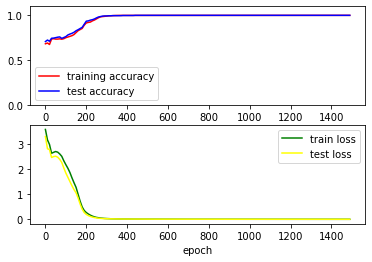

In [3]:
fig_accu = plt.subplot(2, 1, 1)

plt.ylim(0, 1.1)
fig_loss = plt.subplot(2, 1, 2)
fig_accu.plot(x_axis, accu_train, c='red', label='training accuracy')
fig_accu.plot(x_axis, accu_test, c='blue', label='test accuracy')
fig_accu.legend()
fig_loss.plot(x_axis, loss_train, c='green', label='train loss')
fig_loss.plot(x_axis, loss_test, c='yellow', label='test loss')
fig_loss.legend()
plt.xlabel('epoch')
plt.show()

### Train the data & Record accuracy and loss - Stochastic gradient descent
We repeat the training process of MLP with the same dataset while using stochastic gradient descent, which means we update our weights in Linear layers of MLP every time we forward a new data point, rather than update weights after all data in the dataset is calculated. 
The graph of training and testing accuracy and loss is also shown below.

epoch: 0/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 100/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 200/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 300/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 400/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 500/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 600/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 700/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 800/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 900/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 1000/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 1100/1500
train: accu: 1.000, loss: -0.000
test: accu: 1.000, loss: -0.000
epoch: 1200/1500
train: accu

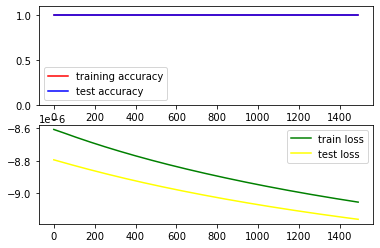

In [6]:
FLAGS.grad_type = 'STOCHASTIC'
x_axis, accu_train, accu_test, loss_train, loss_test = train(mlp, FLAGS)
fig_accu = plt.subplot(2, 1, 1)

plt.ylim(0, 1.1)
fig_loss = plt.subplot(2, 1, 2)
fig_accu.plot(x_axis, accu_train, c='red', label='training accuracy')
fig_accu.plot(x_axis, accu_test, c='blue', label='test accuracy')
fig_accu.legend()
fig_loss.plot(x_axis, loss_train, c='green', label='train loss')
fig_loss.plot(x_axis, loss_test, c='yellow', label='test loss')
fig_loss.legend()
plt.show()

Compared with the MLP using batch gradient descent with the same dataset, we find that:
+ the accuracy and loss reach the same value after enough epoch
    + accuracy: 1
    + loss: 0
+ MLP prediction coverage quickly when using stochastic gradient descent than using batch gradient descent